#### Mengimport semua library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### Membaca Dataset diabetes

In [ ]:
# Membaca dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



#### Mengecek data duplikat

In [ ]:
# Mengecek Data yang duplikat
duplicate_rows_data = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [ ]:
# Mengecek missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# menghitung jumlah nilai yang berbeda atau unik di setiap kolom
for column in dataset.columns:
    num_distinct_values = len(dataset[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [ ]:
dataset.describe().style.format("{:.2f}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
# Mengganti nilai 0 pada kolom dengan nilai rata-rata dari kolom tersebut
mean_blood_pressure = dataset[dataset['BloodPressure'] != 0]['BloodPressure'].mean()
dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = mean_blood_pressure
mean_Glucose = dataset[dataset['Glucose'] != 0]['Glucose'].mean()
dataset.loc[dataset['Glucose'] == 0, 'Glucose'] = mean_Glucose
mean_BMI = dataset[dataset['BMI'] != 0]['BMI'].mean()
dataset.loc[dataset['BMI'] == 0, 'BMI'] = mean_BMI

C:\Users\Hary Capri\AppData\Local\Temp\ipykernel_22208\1726650833.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['BloodPressure'] == 0, 'BloodPressure'] = mean_blood_pressure
C:\Users\Hary Capri\AppData\Local\Temp\ipykernel_22208\1726650833.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['Glucose'] == 0, 'Glucose'] = mean_Glucose


In [ ]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
X = dataset[features]
X.head()

,Glucose,BloodPressure,BMI,Age
0,148.0,72.0,33.6,50
1,85.0,66.0,26.6,31
2,183.0,64.0,23.3,32
3,89.0,66.0,28.1,21
4,137.0,40.0,43.1,33


In [ ]:
X.describe()

,Glucose,BloodPressure,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,121.686763,72.405184,32.457464,33.240885
std,30.435949,12.096346,6.875151,11.760232
min,44.000000,24.000000,18.200000,21.000000
25%,99.750000,64.000000,27.500000,24.000000
50%,117.000000,72.202592,32.400000,29.000000
75%,140.250000,80.000000,36.600000,41.000000
max,199.000000,122.000000,67.100000,81.000000


In [ ]:
X.shape

(768, 4)

In [ ]:
X.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
Age              0
dtype: int64

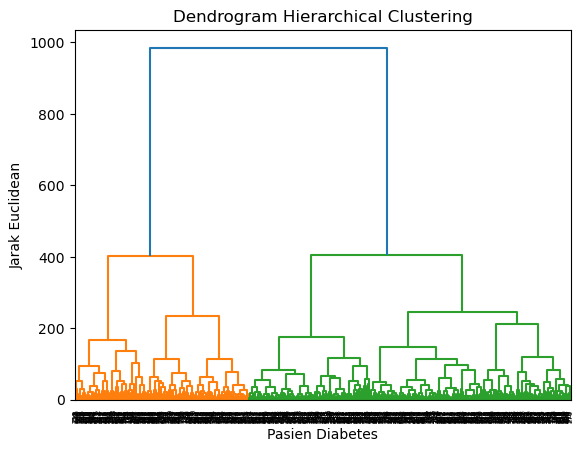

In [ ]:
# Membuat dendogram
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram Hierarchical Clustering")
plt.xlabel("Pasien Diabetes")
plt.ylabel("Jarak Euclidean")
plt.show()

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
cluster = ac.fit(X)
ac.fit(X)

c:\Users\Hary Capri\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Hary Capri\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
ac.labels_

array([0, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0,
       2, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 1,
       0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0,
       1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,

In [ ]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac

,Glucose,BloodPressure,BMI,Age,cluster
0,148.0,72.0,33.6,50,0
1,85.0,66.0,26.6,31,2
2,183.0,64.0,23.3,32,0
3,89.0,66.0,28.1,21,2
4,137.0,40.0,43.1,33,1
...,...,...,...,...,...
763,101.0,76.0,32.9,63,1
764,122.0,70.0,36.8,27,1
765,121.0,72.0,26.2,30,1
766,126.0,60.0,30.1,47,1


c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Frekuensi')

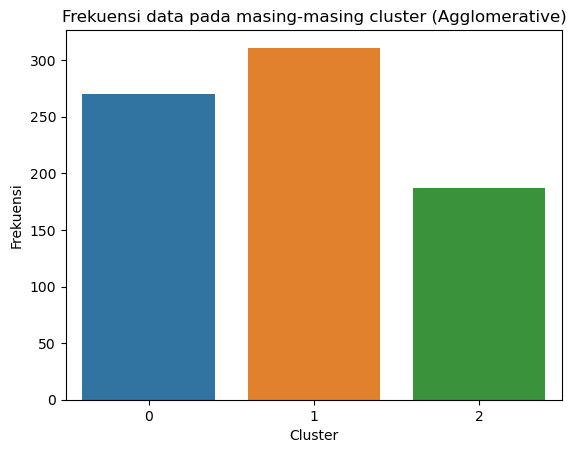

In [ ]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values

sns.barplot(x=cluster_x1, y=cluster_y1)
plt.title("Frekuensi data pada masing-masing cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
# Mapping label klaster ke kategori risiko diabetes
cluster_mapping = {
    0: "High Risk Diabetes",
    1: "Normal Risk Diabetes",
    2: "Low Risk Diabetes"
}

# Mengganti label klaster dengan kategori risiko diabetes
hasil_ac["Risk Category"] = hasil_ac["cluster"].map(cluster_mapping)

# Menampilkan hasil dengan kategori risiko diabetes
hasil_ac


,Glucose,BloodPressure,BMI,Age,cluster,Risk Category
0,148.0,72.0,33.6,50,0,High Risk Diabetes
1,85.0,66.0,26.6,31,2,Low Risk Diabetes
2,183.0,64.0,23.3,32,0,High Risk Diabetes
3,89.0,66.0,28.1,21,2,Low Risk Diabetes
4,137.0,40.0,43.1,33,1,Normal Risk Diabetes
...,...,...,...,...,...,...
763,101.0,76.0,32.9,63,1,Normal Risk Diabetes
764,122.0,70.0,36.8,27,1,Normal Risk Diabetes
765,121.0,72.0,26.2,30,1,Normal Risk Diabetes
766,126.0,60.0,30.1,47,1,Normal Risk Diabetes


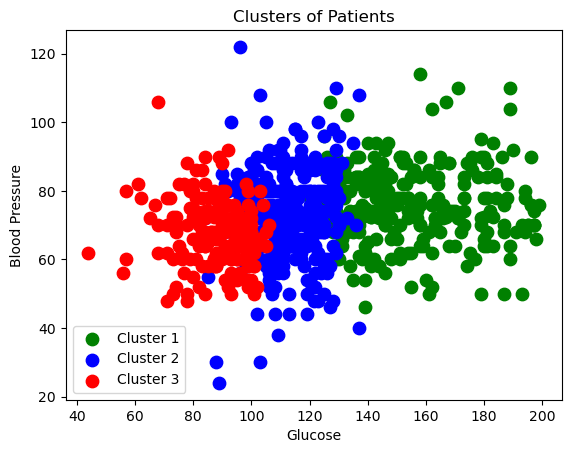

In [ ]:
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan cluster
cluster_0 = hasil_ac[hasil_ac["cluster"] == 0]
cluster_1 = hasil_ac[hasil_ac["cluster"] == 1]
cluster_2 = hasil_ac[hasil_ac["cluster"] == 2]

# Scatter plot untuk setiap cluster terhadap Glucose, BloodPressure, BMI, dan Age
plt.scatter(cluster_0['Glucose'], cluster_0['BloodPressure'], s=80, c="green", label="Cluster 1")
plt.scatter(cluster_1['Glucose'], cluster_1['BloodPressure'], s=80, c="blue", label="Cluster 2")
plt.scatter(cluster_2['Glucose'], cluster_2['BloodPressure'], s=80, c="red", label="Cluster 3")


plt.title("Clusters of Patients")
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.legend()
plt.show()


##### 1 DENGAN TINGKAT KEPARAHAN YANG TINGGI
##### 2 DENGAN TINGKAT KEPARAHAN YANG SEDANG
##### 3 DENGAN TINGKAT KEPARAHAN YANG RENDAH

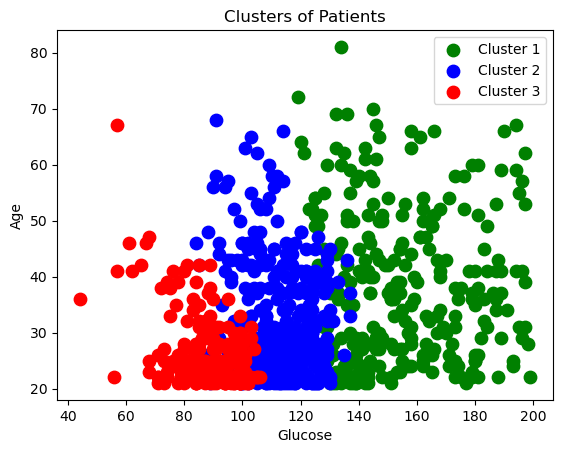

In [ ]:
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan cluster
cluster_0 = hasil_ac[hasil_ac["cluster"] == 0]
cluster_1 = hasil_ac[hasil_ac["cluster"] == 1]
cluster_2 = hasil_ac[hasil_ac["cluster"] == 2]

# Scatter plot untuk setiap cluster terhadap Glucose, BloodPressure, BMI, dan Age
plt.scatter(cluster_0['Glucose'], cluster_0['Age'], s=80, c="green", label="Cluster 1")
plt.scatter(cluster_1['Glucose'], cluster_1['Age'], s=80, c="blue", label="Cluster 2")
plt.scatter(cluster_2['Glucose'], cluster_2['Age'], s=80, c="red", label="Cluster 3")


plt.title("Clusters of Patients")
plt.xlabel("Glucose")
plt.ylabel("Age")
plt.legend()
plt.show()


c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

KeyError: 'Cluster'

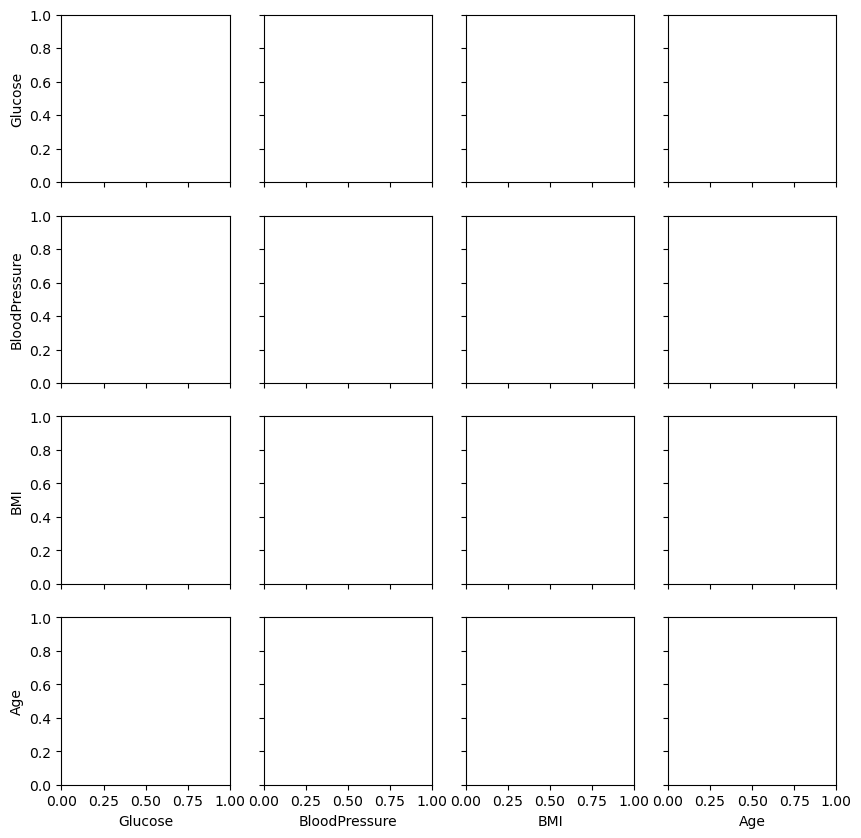

In [ ]:
important_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
sns.pairplot(dataset, vars=important_features, hue='Cluster', palette='viridis')
plt.show()

In [ ]:
num_clusters = len(hasil_ac['cluster'].unique())
# Mendapatkan jumlah klaster yang terbentuk

# Statistik deskriptif untuk setiap klaster
for cluster_num in range(num_clusters):
    cluster_data = hasil_ac[hasil_ac['cluster'] == cluster_num]
    print(f"Statistics for Cluster {cluster_num}")
    print(cluster_data.describe())


Statistics for Cluster 0
          Glucose  BloodPressure         BMI         Age  cluster
count  270.000000     270.000000  270.000000  270.000000    270.0
mean   155.218519      75.929119   34.061166   38.351852      0.0
std     20.402102      11.296563    6.821982   13.615208      0.0
min    119.000000      46.000000   19.600000   21.000000      0.0
25%    139.000000      70.000000   29.550000   27.000000      0.0
50%    151.000000      76.000000   33.300000   36.000000      0.0
75%    171.000000      84.000000   38.350000   49.000000      0.0
max    199.000000     114.000000   59.400000   81.000000      0.0
Statistics for Cluster 1
          Glucose  BloodPressure         BMI         Age  cluster
count  311.000000     311.000000  311.000000  311.000000    311.0
mean   112.982102      72.108882   32.684204   32.678457      1.0
std     10.463793      13.156537    6.616111   10.302810      0.0
min     84.000000      24.000000   20.800000   21.000000      1.0
25%    106.000000      64.

c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


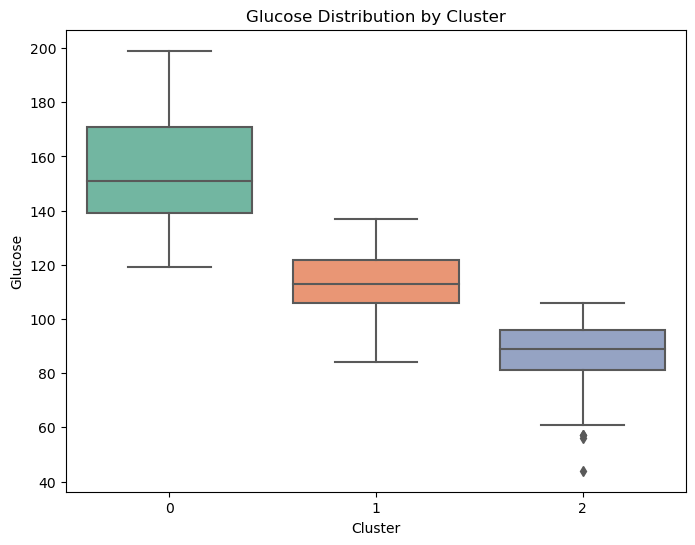

c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


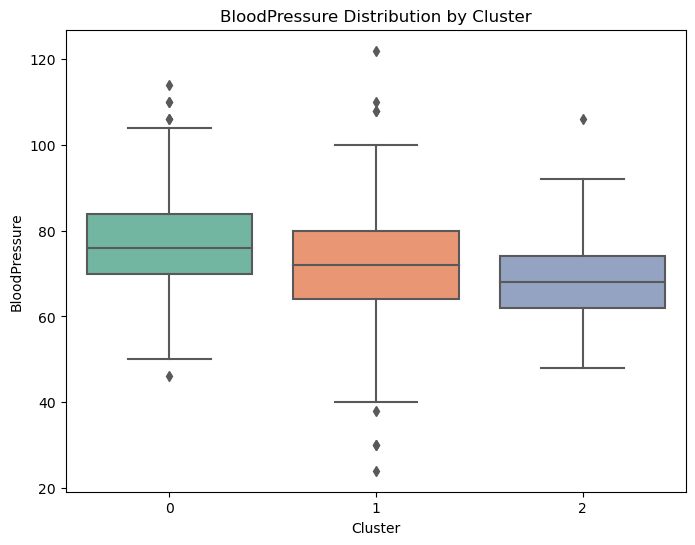

c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


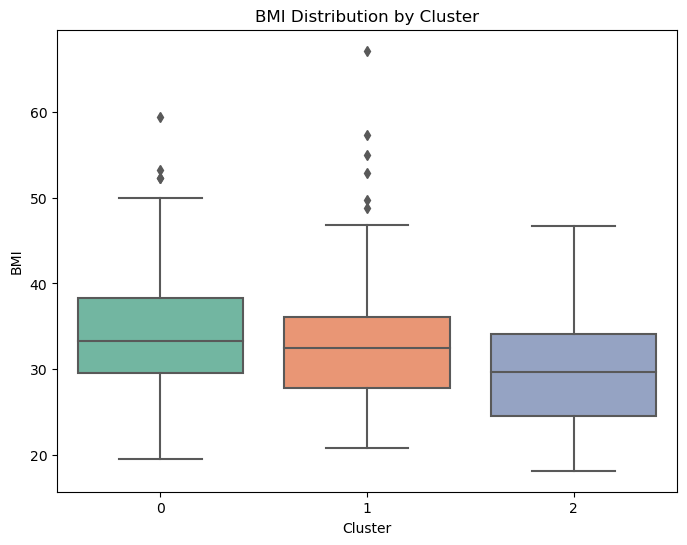

c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hary Capri\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


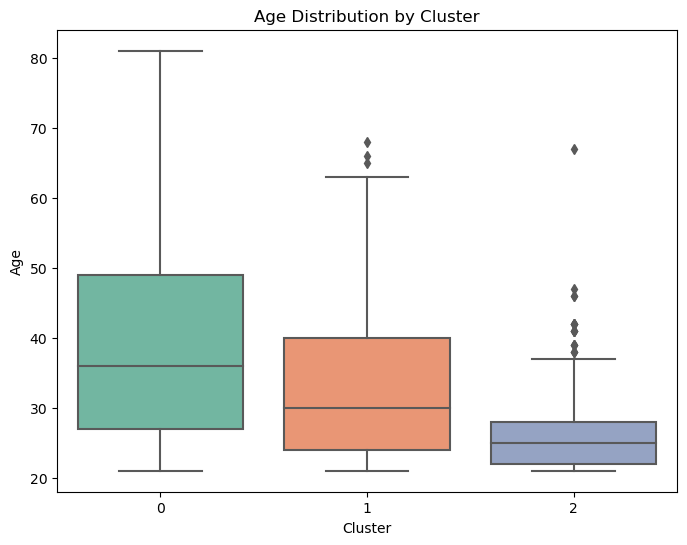

In [ ]:
# Definisikan variabel important_features
important_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']

# ...
# menggunakan loop untuk visualisasi
cluster_column_name = 'cluster'  # Ganti dengan nama kolom klaster yang sesuai

for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cluster_column_name, y=feature, data=hasil_ac, palette='Set2')
    plt.title(f"{feature} Distribution by {cluster_column_name.capitalize()}")
    plt.xlabel(cluster_column_name.capitalize())
    plt.ylabel(feature)
    plt.show()


In [ ]:
# Memisahkan data berdasarkan cluster setelah klasterisasi
cluster_0 = hasil_ac[hasil_ac["cluster"] == 0]
cluster_1 = hasil_ac[hasil_ac["cluster"] == 1]
cluster_2 = hasil_ac[hasil_ac["cluster"] == 2]

# Analisis korelasi antara fitur-fitur di dalam klaster tertentu
cluster_0_corr = cluster_0[important_features].corr()
cluster_1_corr = cluster_1[important_features].corr()
cluster_2_corr = cluster_2[important_features].corr()

# Identifikasi perbedaan signifikan antara klaster menggunakan uji t-test
from scipy.stats import ttest_ind

for feature in important_features:
    cluster_0_values = cluster_0[feature]
    cluster_1_values = cluster_1[feature]
    cluster_2_values = cluster_2[feature]

    _, p_val_01 = ttest_ind(cluster_0_values, cluster_1_values)
    _, p_val_02 = ttest_ind(cluster_0_values, cluster_2_values)
    _, p_val_12 = ttest_ind(cluster_1_values, cluster_2_values)

    print(f"Feature: {feature}")
    print(f"P-value between Cluster 0 and 1: {p_val_01}")
    print(f"P-value between Cluster 0 and 2: {p_val_02}")
    print(f"P-value between Cluster 1 and 2: {p_val_12}")


### intinya :
'''
Memisahkan Data Berdasarkan Klaster:

Data dipisahkan menjadi tiga kelompok berdasarkan klaster yang dihasilkan dari algoritma klasterisasi sebelumnya.
Analisis Korelasi:

Dilakukan analisis korelasi antara fitur-fitur di dalam setiap klaster.
Ini membantu untuk memahami hubungan antara fitur-fitur yang ada di setiap klaster. Misalnya, seberapa kuat hubungan antara Glukosa dan BMI di setiap klaster.
Uji T-Test untuk Identifikasi Perbedaan:

Dilakukan uji statistik T-Test antara setiap pasangan klaster untuk setiap fitur.
P-value yang dihasilkan dari uji ini memberikan informasi tentang seberapa signifikan perbedaan antara klaster tersebut untuk setiap fitur.
Semakin kecil nilai P-value, semakin signifikan perbedaannya. Nilai rendah menunjukkan bahwa perbedaan antara kelompok tersebut lebih signifikan secara statistik.
'''

Feature: Glucose
P-value between Cluster 0 and 1: 4.5383451547402875e-130
P-value between Cluster 0 and 2: 4.250039696875802e-156
P-value between Cluster 1 and 2: 4.763632424357196e-93
Feature: BloodPressure
P-value between Cluster 0 and 1: 0.00021395178407082157
P-value between Cluster 0 and 2: 7.727136790297913e-15
P-value between Cluster 1 and 2: 0.00011179271558767805
Feature: BMI
P-value between Cluster 0 and 1: 0.013948330517080706
P-value between Cluster 0 and 2: 5.860908867099839e-11
P-value between Cluster 1 and 2: 2.3917444331612904e-06
Feature: Age
P-value between Cluster 0 and 1: 1.8630130244245627e-08
P-value between Cluster 0 and 2: 4.12338136980598e-24
P-value between Cluster 1 and 2: 1.0422978934228046e-11


'\nMemisahkan Data Berdasarkan Klaster:\n\nData dipisahkan menjadi tiga kelompok berdasarkan klaster yang dihasilkan dari algoritma klasterisasi sebelumnya.\nAnalisis Korelasi:\n\nDilakukan analisis korelasi antara fitur-fitur di dalam setiap klaster.\nIni membantu untuk memahami hubungan antara fitur-fitur yang ada di setiap klaster. Misalnya, seberapa kuat hubungan antara Glukosa dan BMI di setiap klaster.\nUji T-Test untuk Identifikasi Perbedaan:\n\nDilakukan uji statistik T-Test antara setiap pasangan klaster untuk setiap fitur.\nP-value yang dihasilkan dari uji ini memberikan informasi tentang seberapa signifikan perbedaan antara klaster tersebut untuk setiap fitur.\nSemakin kecil nilai P-value, semakin signifikan perbedaannya. Nilai rendah menunjukkan bahwa perbedaan antara kelompok tersebut lebih signifikan secara statistik.\n'

In [ ]:
# Simpan DataFrame ke file CSV
hasil_ac.to_csv('hasil_diabetes.csv', index=False)


In [ ]:
hasil_ac.head()

,Glucose,BloodPressure,BMI,Age,cluster
0,148.0,72.0,33.6,50,0
1,85.0,66.0,26.6,31,2
2,183.0,64.0,23.3,32,0
3,89.0,66.0,28.1,21,2
4,137.0,40.0,43.1,33,1
